# Kuantum Teleportasyon

Kuantum teleportasyon, kuantum fiziği ilkelerine dayanan bir iletişim protokolüdür. Bu protokol, bir kuantum durumunu uzun mesafelere iletmek için belirsizlik ilkesi ve kuantum durumunun ölçüm veya iletim sırasında değiştiği gerçeği gibi kuantum mekaniğinin özelliklerini kullanır. Bu aktarım, fiziksel taşıma olmaksızın bir parçacığın bir yerden başka bir yere bilgi aktarımı olarak gerçekleşir.

Kuantum teleportasyon protokolü genellikle üç kübit arasında gerçekleştirilir. Bu üç kübit bir gönderici (Alice) kübit, bir alıcı (Bob) kübit ve bir dolaşık kübitten oluşur. Gönderici kübit ışınlanacak kuantum durumunu taşır. Dolaşık kübit, gönderici ve alıcı kübitler arasında kuantum durumunun aktarılmasını sağlayan özel bir ilişkiye sahiptir.

Protokol genellikle aşağıdaki adımları içerir:

Gönderici (Alice) göndermek istediği kuantum durumunu kubit ile etkileşime girerek ölçer.
Gönderici, ölçümler sonucunda elde ettiği klasik bilgiyi alıcıya (Bob) iletir.
Alıcı, aldığı klasik bilgiyi kullanarak kendi kontrolündeki küme kubit ile bir ölçüm yapar ve bu ölçüm sonucunda gönderici kubitin durumunu alır.
Kuantum teleportasyon, kuantum bilgi işleme ve kuantum iletişimde önemli bir rol oynar. Kriptografi, kuantum hesaplama ve kuantum iletişim gibi alanlarda uygulama potansiyeline sahiptir.

In [5]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

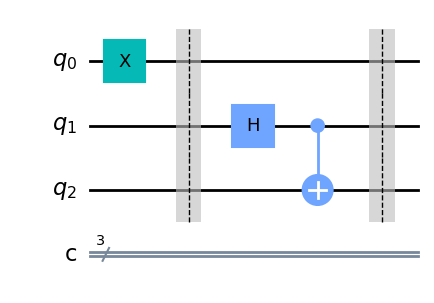

In [6]:
# İlk olarak, 3 kuantum birimi ve 3 klasik birim içeren bir kuantum devresi oluşturduk.

circuit=QuantumCircuit(3,3)


## İlk adımda, ilk birimi hazırladık, ona "0" değerini atadık ve ardından işlemleri birbirinden ayırarak düzenli kalmasını sağlamak için bir bariyer ekledik

circuit.x(0)
circuit.barrier()


# İkinci adımda, ikinci birime bir şey yaptık. Onu belirsiz bir duruma getirdik; hem "0" hem de "1" olasılıkları vardı. Bunu yapmak için bir Hadamard kapısı kullandık.

circuit.h(1)


# Üçüncü adımda, ikinci birim ile üçüncü birim arasında bir iletişim kurduk. Bir tür ilişki kurduk ve ikinci birimin durumunu üçüncü birime aktardık. Bunu yapmak için bir CNOT kapısı kullandık.

circuit.cx(1,2)


# Bir bariyer daha ekledik ve ne yaptığımızı açıkça görselleştirdik, böylece oluşturduğumuz kuantum devresinin adım adım nasıl ilerlediğini görebildik

circuit.barrier()
circuit.draw(output='mpl')

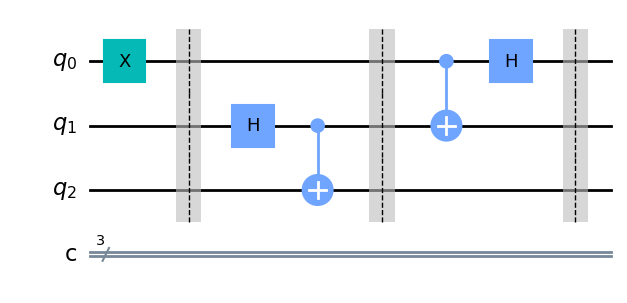

In [7]:
# Bu adımda, bir CNOT kapısı kullanarak kübitler üzerinde bir işlem gerçekleştiriyoruz. kubit 0, kubit 1'i kontrol eder. Bu, veri aktarımı için kuantum teleportasyon protokolünde bir adımı temsil eder.

circuit.cx(0,1)


# Burada, Hadamard geçidini 0 kübitine uyguluyoruz. Bu kapı kubiti belirsiz bir duruma sokar, yani "0" ve "1" durumları arasında bir süperpozisyon oluşturur.

circuit.h(0)


# Bir bariyer daha ekledik ve ne yaptığımızı açıkça görselleştirdik, böylece oluşturduğumuz kuantum devresinin adım adım nasıl ilerlediğini görebildik.

circuit.barrier()
circuit.draw(output='mpl')

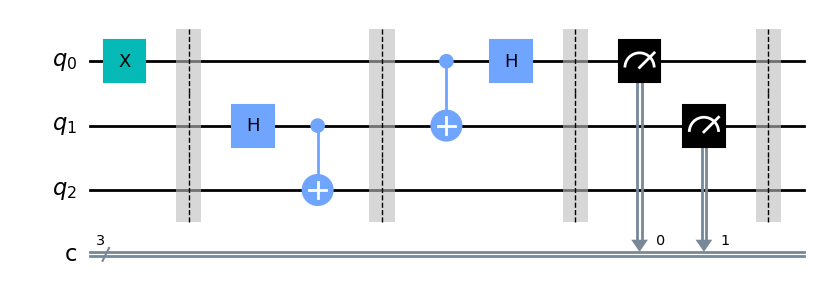

In [8]:
# Bu adımda, 0 ve 1 kübitlerini ölçüyoruz ve sonuçları 0 ve 1 klasik bitlerine kaydediyoruz. Yani, 0 ve 1 kübitlerinin durumunu klasik bitlere çeviriyoruz.

circuit.measure([0,1],(0,1))


# Bir bariyer daha ekledik ve ne yaptığımızı açıkça görselleştirdik, böylece oluşturduğumuz kuantum devresinin adım adım nasıl ilerlediğini görebildik.

circuit.barrier()
circuit.draw(output='mpl')

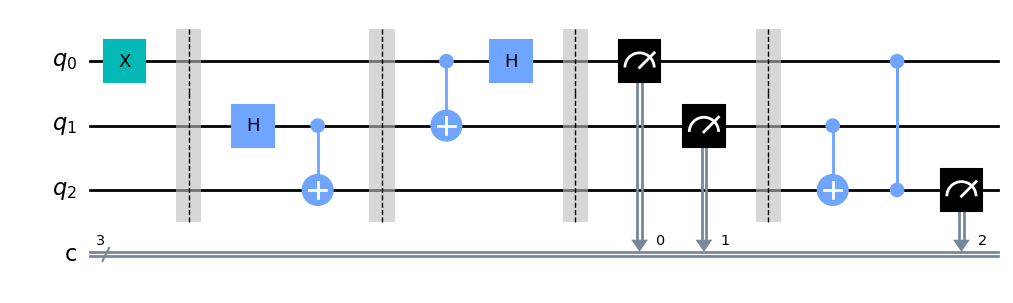

In [9]:
# Bir CNOT kapısı kullanarak qubit 1'i kontrol ediyoruz ve bunu qubit 2'ye uyguluyoruz.

circuit.cx(1,2)


# Kübit 0'ı bir CZ (Kontrollü-Z) geçidi kullanarak kontrol ediyoruz ve bunu kübit 2'ye uyguluyoruz. Bu, kuantum teleportasyon protokolünün son adımıdır

circuit.cz(0,2)


# Devrede 2 numaralı kübiti ölçüyoruz ve sonucu 2 numaralı klasik bite kaydediyoruz. 

circuit.measure([2],[2])


circuit.draw(output='mpl')

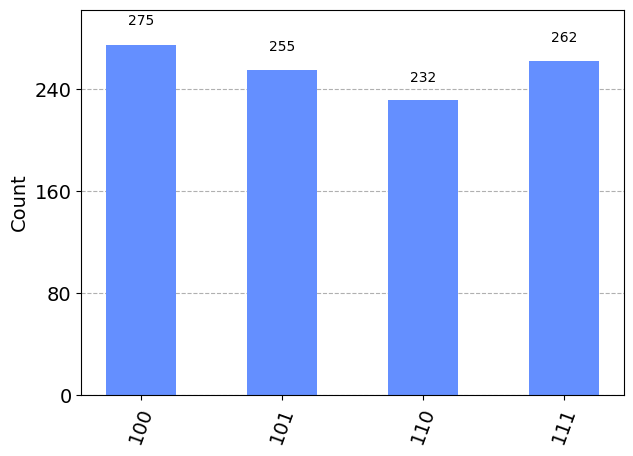

In [10]:
simulator= Aer.get_backend('qasm_simulator')
result=execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts(circuit))